# So what's a histogram?

It represents the distribution of pixel intensities (whether color or gray- scale) in an image. It can be visualized as a graph (or plot) that gives a high-level intuition of the intensity (pixel value) distribution. We are going to assume a RGB color space in this example, so these pixel values will be in the range of 0 to 255.

When plotting the histogram, the X-axis serves as our “bins.” If we construct a histogram with 256 bins, then we are effectively counting the number of times each pixel value occurs. In contrast, if we use only 2 (equally spaced) bins, then we are counting the number of times a pixel is in the range [0, 128] or [128, 255]. The number of pixels binned to the x-axis value is then plotted on the y-axis.

# Using OpenCV to compute Histograms

We will be using the cv2.calcHist  function to build our histograms. Before we get into any code examples, let’s quickly review the function:

cv2.calcHist(images, channels, mask, histSize, ranges)
* images: This is the image that we want to compute a histogram for. Wrap it as a list: $[myImage]$ 

* channels: A list of indexes, where we specify the index of the channel we want to compute a histogram for. To compute a histogram of a grayscale image, the list would be [0] . To compute a histogram for all three red, green, and blue channels, the channels list would be [0, 1, 2] .

* mask: Remember learning about masks in Section 1.4.8? Well, here we can supply a mask. If a mask is provided, a histogram will be computed for masked pixels only. If we do not have a mask or do not want to apply one, we can just provide a value of None .

* histSize: This is the number of bins we want to use when computing a histogram. Again, this is a list, one for each channel we are computing a histogram for. The bin sizes do not all have to be the same. Here is an example of 32 bins for each channel: [32, 32, 32] .

* ranges: The range of possible pixel values. Normally, this is [0, 256] (this is not a typo — the ending range of the cv2.calcHist  function is non-inclusive so you’ll want to provide a value of 256 rather than 255) for each channel, but if you are using a color space other than RGB [such as HSV], the ranges might be different.)

(0.0, 256.0)

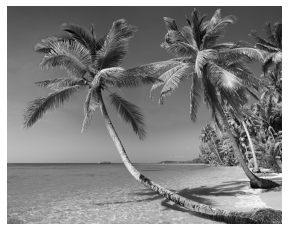

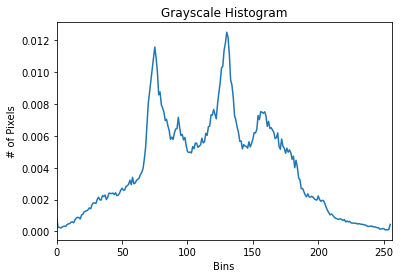

In [1]:
# import the necessary packages
from matplotlib import pyplot as plt
import cv2
import imutils

# load the image and convert it to grayscale
image = cv2.imread("beach.png")
gray  = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# construct a grayscale histogram
hist = cv2.calcHist([gray], [0], None, [256], [0, 256])

# matplotlib expects RGB images so convert and then display the image
# with matplotlib to avoid GUI conflicts/errors (mainly on macOS)
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))

# normalize the histogram
hist /= hist.sum()

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist)
plt.xlim([0, 256])

(0.0, 256.0)

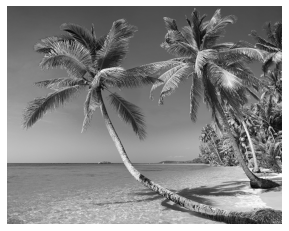

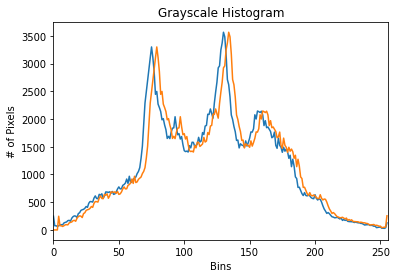

In [2]:
import numpy as np

# Check that a change in brightness matches a displacement in the histogram

gray2 = gray.copy()

# construct a grayscale histogram
hista = cv2.calcHist([gray], [0], None, [256], [0, 256])


M = np.ones(gray2.shape, dtype = "uint8") * 4
added = cv2.add(gray2, M)

histb = cv2.calcHist([added], [0], None, [256], [0, 256])

# normalize the histogram

# matplotlib expects RGB images so convert and then display the image
# with matplotlib to avoid GUI conflicts/errors (mainly on macOS)
plt.figure()
plt.axis("off")
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.imshow(cv2.cvtColor(added, cv2.COLOR_GRAY2RGB))


# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hista)
plt.plot(histb)
plt.xlim([0, 256])

# Color Histograms

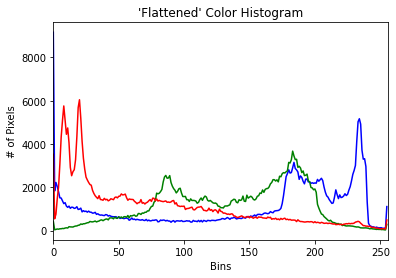

In [3]:
# grab the image channels, initialize the tuple of colors and the figure
chans = cv2.split(image)
colors = ("b", "g", "r")
plt.figure()
plt.title("'Flattened' Color Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
# loop over the image channels
for (chan, color) in zip(chans, colors):
	# create a histogram for the current channel and plot it
	hist = cv2.calcHist([chan], [0], None, [256], [0, 256])
	plt.plot(hist, color = color)
	plt.xlim([0, 256])

2D histogram shape: (32, 32), with 1024 values


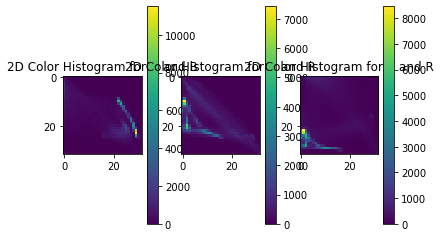

In [4]:
# let's move on to 2D histograms -- we need to reduce the
# number of bins in the histogram from 256 to 32 so we can
# better visualize the results
fig = plt.figure()

# plot a 2D color histogram for green and blue
ax = fig.add_subplot(131)
hist = cv2.calcHist([chans[1], chans[0]], [0, 1], None, [32, 32],	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and B")
plt.colorbar(p)

# plot a 2D color histogram for green and red
ax = fig.add_subplot(132)
hist = cv2.calcHist([chans[1], chans[2]], [0, 1], None, [32, 32],	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for G and R")
plt.colorbar(p)

# plot a 2D color histogram for blue and red
ax = fig.add_subplot(133)
hist = cv2.calcHist([chans[0], chans[2]], [0, 1], None, [32, 32],	[0, 256, 0, 256])
p = ax.imshow(hist, interpolation="nearest")
ax.set_title("2D Color Histogram for B and R")
plt.colorbar(p)

# finally, let's examine the dimensionality of one of the 2D histograms
print("2D histogram shape: {}, with {} values".format(hist.shape, hist.flatten().shape[0]))

3D histogram shape: (8, 8, 8), with 512 values


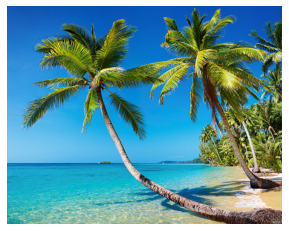

In [5]:
# our 2D histogram could only take into account 2 out of the 3
# channels in the image so now let's build a 3D color histogram
# (utilizing all channels) with 8 bins in each direction -- we
# can't plot the 3D histogram, but the theory is exactly like
# that of a 2D histogram, so we'll just show the shape of the
# histogram
hist = cv2.calcHist(image, [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])

print("3D histogram shape: {}, with {} values".format(
	hist.shape, hist.flatten().shape[0]))

# display the image with matplotlib to avoid GUI conflicts on macOS
plt.figure()
plt.axis("off")
plt.imshow(imutils.opencv2matplotlib(image))

# show our plots
plt.show()

# Equalize

(0.0, 256.0)

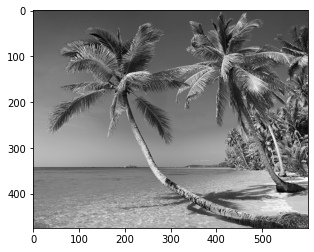

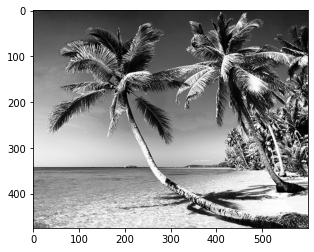

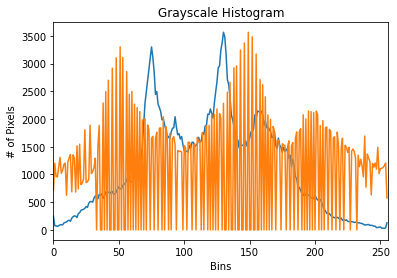

In [6]:
# apply histogram equalization to stretch the contrast of our image
eq = cv2.equalizeHist(gray)

# show our images. Notice how the contrast of the second image has been stretched
plt.figure()
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB))
plt.figure()
plt.imshow(cv2.cvtColor(eq, cv2.COLOR_GRAY2RGB))


# you can check that the equalization stretches the histogram> 

hist_in  = cv2.calcHist([gray], [0], None, [256], [0, 256])
hist_out = cv2.calcHist([eq],   [0], None, [256], [0, 256])

# plot the histogram
plt.figure()
plt.title("Grayscale Histogram")
plt.xlabel("Bins")
plt.ylabel("# of Pixels")
plt.plot(hist_in)
plt.plot(hist_out)
plt.xlim([0, 256])

# Histogram with mask

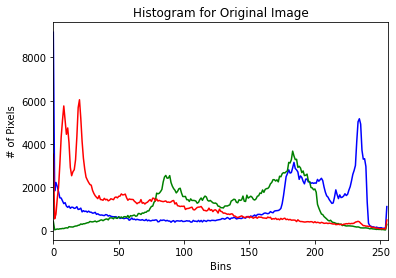

In [9]:
# import the necessary packages
from matplotlib import pyplot as plt
import numpy as np
import cv2

def plot_histogram(image, title, mask=None):
	# grab the image channels, initialize the tuple of colors and the figure
	chans = cv2.split(image)
	colors = ("b", "g", "r")
	plt.figure()
	plt.title(title)
	plt.xlabel("Bins")
	plt.ylabel("# of Pixels")
 
	# loop over the image channels
	for (chan, color) in zip(chans, colors):
		# create a histogram for the current channel and plot it
		hist = cv2.calcHist([chan], [0], mask, [256], [0, 256])
		plt.plot(hist, color=color)
		plt.xlim([0, 256])
  
  
# load the beach image and plot a histogram for it
image = cv2.imread("beach.png")
plot_histogram(image, "Histogram for Original Image")

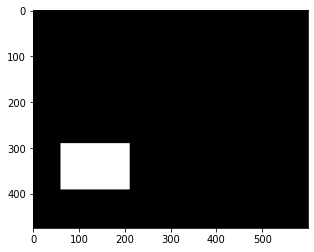

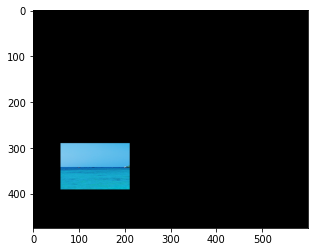

In [13]:
# construct a mask for our image -- our mask will be BLACK for regions
# we want to IGNORE and WHITE for regions we want to EXAMINE
our_mask = np.zeros(image.shape[:2], dtype="uint8")
cv2.rectangle(our_mask, (60, 290), (210, 390), 255, -1)
plt.figure()
plt.imshow(cv2.cvtColor(our_mask, cv2.COLOR_GRAY2RGB))

# what does masking our image look like?
masked = cv2.bitwise_and(image, image, mask=our_mask)
plt.figure()
plt.imshow(cv2.cvtColor(masked, cv2.COLOR_BGR2RGB))


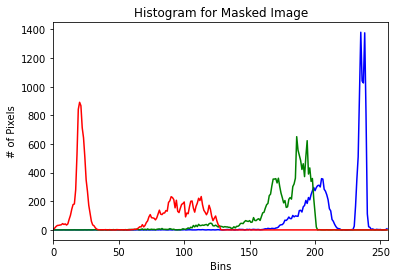

In [14]:
# compute a histogram for our image, but we'll only include pixels in
# the masked region
plot_histogram(image, "Histogram for Masked Image", mask=our_mask)
# show our plots
plt.show()